# Capstone Project - The Battle of Neighborhoods


## Introduction

COVID-19 not only has caused lots of deaths and grief to some around the world, but only has coused an economic lost in many countries.

This disruption on our life has created the necesity of many people to move to another cities in their countries.

Mexico City it is not the exception and as a Mexican we have seen how many people is looking for a better neighbourhood wich has all the best venues and make the best decision to move to a new neighbour.

Mexico City is one of the largest around the world and over the last decades has been growing faster in Latin America with more than 9 million people in the Cit and almost 20 million people in the metropolitan area. 

In this report we will try to analyse what are the best neighbourhoods in the city according to its venues and other services which would be a valuable information to make people have the best decision acording the features of a neighbourhood can offer.


## Data Requeriments

To achieve the objectives of this report we will use some Data Science concepts and techiniques such as Machine Learning.

We will be using the following information:  
 * Mexico City, list of the boroughs according with its zipcodes, latitude and longitud. Data source : https://datos.gob.mx/busca/dataset?q=codigos%20postales&
 * Information of the top venues in each neighbourhood by using the Fousquare API Description.
 * We are going to generate maps to visualize the neighborhoods and how they cluster together by using the Geopy library from Python.
 * We explore how many boroughs and neighboarhoods contains the data set file.
 
With all this features we can start the process of analysing, reporting and making conclusions about the results.  
 
## Methodology
 
As we previously mentioned, we will work with only boroughs of Mexico City.  

We are going to generate maps to visualize the neighborhoods and how they cluster together.  

Before we get the data and start exploring it, let's download all the dependencies that we will need.


In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.1               |             py_0          26 KB  conda-forge
    openssl-1.1.1h             |       h516909a_0         2.1 MB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    certifi-2020.6.20          |   py36h9880bd3_2         151 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                       

### Dowload and Explore Dataset  
Mexico City's neighbourhoods are divided in 16 boroughs. In order to segment the neighborhoods and explore them, we will essentially need a dataset that contains the 16 boroughs and the neighborhoods that exist in each borough as well as the the latitude and longitude coordinates of each neighborhood.

This dataset was taken from the official site of the government in  https://datos.gob.mx/busca/dataset?q=codigos%20postales&

We previously downloaded the file and placed it on our IBM Watson Studio session server, so we can simply run the following code to get and access the data. 

Let's take a quick look of the data.

In [4]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_835b5d063a29441b961612412943b13a = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='FQL7z24FuSjk9JmMtQhLmZDNAt9sx0NIRayR1rVM8M0D',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_835b5d063a29441b961612412943b13a.get_object(Bucket='courseracapstone-donotdelete-pr-8m3qbnwwmalt9s',Key='MX.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,CountryCode,PostalCode,Neighbourhood,State,Borough,StateCode,latitude,longitude
0,MX,20000,Zona Centro,Aguascalientes,Aguascalientes,1,21.8734,-102.2806
1,MX,20010,Las Brisas,Aguascalientes,Aguascalientes,1,21.9644,-102.3192
2,MX,20010,San Cayetano,Aguascalientes,Aguascalientes,1,21.9644,-102.3192
3,MX,20010,Ramon Romo Franco,Aguascalientes,Aguascalientes,1,21.9644,-102.3192
4,MX,20010,Olivares Santana,Aguascalientes,Aguascalientes,1,21.9644,-102.3192


We only process the cells that have a borough in Mexico City

In [5]:
#we rename de column Neighbourhood, according with the data that Foursquare will return
df.rename(columns={'Neighbourhood': 'Neighborhood'}, inplace=True)

df.drop(df[df['State']!="Distrito Federal"].index,axis=0, inplace=True)
df.drop(['CountryCode', 'State', 'StateCode'], axis='columns', inplace=True)
df = df.reset_index(drop=True)
df.head()

,PostalCode,Neighborhood,Borough,latitude,longitude
0,2000,Centro de Azcapotzalco,Azcapotzalco,19.4815,-99.1862
1,2008,Delegacion Politica Azcapotzalco,Azcapotzalco,19.4815,-99.1862
2,2010,Los Reyes,Azcapotzalco,19.4853,-99.1821
3,2010,San Rafael,Azcapotzalco,19.3961,-99.1170
4,2010,Nuevo Barrio San Rafael,Azcapotzalco,19.3961,-99.1170


We consider that one neighborhood can exist in one postal code area, then these rows will be combined into one row with the neighborhoods separated with a comma.

In [6]:
df2= df.groupby('PostalCode').agg(lambda x: ','.join(x))
df2.head()

,Neighborhood,Borough
PostalCode,,
1000,San Angel,Alvaro Obregon
1010,Los Alpes,Alvaro Obregon
1020,Guadalupe Inn,Alvaro Obregon
1029,INFONAVIT,Alvaro Obregon
1030,"Florida,Axotla","Alvaro Obregon,Alvaro Obregon"


In [7]:
neighborhoods= pd.merge(df, df2, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

neighborhoods.head()

,PostalCode,Neighborhood,Borough,latitude,longitude
0,11250,10 de Abril,Miguel Hidalgo,19.4486,-99.2110
1,15290,10 de Mayo,Venustiano Carranza,19.4332,-99.1202
2,7058,15 de Agosto,Gustavo A. Madero,19.4939,-99.1108
3,11810,16 de Septiembre,Miguel Hidalgo,19.4043,-99.1928
4,15440,1o. de Mayo,Venustiano Carranza,19.4431,-99.1134


Now we can remove the duplicate boroughts as follows:

In [8]:
neighborhoods['Borough']= neighborhoods['Borough'].str.replace('nan|[{}\s]','').str.split(',').apply(set).str.join(',').str.strip(',').str.replace(",{2,}",",")
neighborhoods = neighborhoods.reset_index()
neighborhoods.head()

,index,PostalCode,Neighborhood,Borough,latitude,longitude
0,0,11250,10 de Abril,MiguelHidalgo,19.4486,-99.2110
1,1,15290,10 de Mayo,VenustianoCarranza,19.4332,-99.1202
2,2,7058,15 de Agosto,GustavoA.Madero,19.4939,-99.1108
3,3,11810,16 de Septiembre,MiguelHidalgo,19.4043,-99.1928
4,4,15440,1o. de Mayo,VenustianoCarranza,19.4431,-99.1134


We finish making sure that the dataset has all 16 boroughs.

In [9]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 16 boroughs and 1099 neighborhoods.


#### Use geopy library to get the latitude and longitude values of Mexico City.  
Let's get the geographical coordinates of Mexico City and in order to define an instance of the geocoder, we need to define a user_agent. We will name our agent mx_explorer, as shown below.

In [10]:
address = 'Mexico City, MX'

geolocator = Nominatim(user_agent="mx_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Mexico City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Mexico City are 19.4326296, -99.1331785.


#### Create a map of Mexico City with neighborhoods superimposed on top.

In [11]:
# create map of Mexico City using latitude and longitude values
map_mexicocity = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['latitude'], neighborhoods['longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mexicocity)  
    
map_mexicocity

Folium is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.

For this report purposes, we simplify the above map and segment and cluster only one of the main Boroughs and its neighbourhoods are near City Center heart of Mexico City, which is Cuauhtemoc. So let's slice the original dataframe and create a new dataframe of the Cuauhtemoc data.

In [12]:
cuauhtemoc_data = neighborhoods[neighborhoods['Borough'] == 'Cuauhtemoc'].reset_index(drop=True)
cuauhtemoc_data.head()

,index,PostalCode,Neighborhood,Borough,latitude,longitude
0,48,6880,Algarin,Cuauhtemoc,19.4053,-99.1408
1,54,6890,Ampliacion Asturias,Cuauhtemoc,19.4070,-99.1313
2,113,6850,Asturias,Cuauhtemoc,19.4039,-99.1308
3,116,6450,Atlampa,Cuauhtemoc,19.4581,-99.1562
4,125,6038,Banorte,Cuauhtemoc,19.4364,-99.1553


As we did with all the Boroughs we will create a map only with the Boroughs that contains 'Cuauhtemoc'

In [13]:
# create map of Cuauhtemoc Borough using latitude and longitude values
map_cuauhtemoc = folium.Map(location=[latitude, longitude], zoom_start=14)

# add markers to map
for lat, lng, label in zip(cuauhtemoc_data['latitude'], cuauhtemoc_data['longitude'], cuauhtemoc_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cuauhtemoc)  
    
map_cuauhtemoc

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

Define Foursquare Credentials and Version

In [14]:
# @hidden_cell
CLIENT_ID = 'XUIQAKXIYWZ2SHA4K4UANX2JZBYJAUT1GMFGK3OENTAO5EQN' #'your-client-ID' # your Foursquare ID
CLIENT_SECRET = '1BG3OZ0ELQVVQMDIYRJJNFQ41ZKF3SKR03OFH0XF323Z0FBN'# 'your-client-secret' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XUIQAKXIYWZ2SHA4K4UANX2JZBYJAUT1GMFGK3OENTAO5EQN
CLIENT_SECRET:1BG3OZ0ELQVVQMDIYRJJNFQ41ZKF3SKR03OFH0XF323Z0FBN


Let's explore the City Centre neighborhood in our dataframe.
Get the neighborhood's name.

In [15]:
cuauhtemoc_data.loc[11, 'Neighborhood']

'Centro (A\x81rea 1)'

Get the neighborhood's latitude and longitude values.

In [16]:
neighborhood_latitude = cuauhtemoc_data.loc[11, 'latitude'] # neighborhood latitude value
neighborhood_longitude = cuauhtemoc_data.loc[11, 'longitude'] # neighborhood longitude value

neighborhood_name = cuauhtemoc_data.loc[11, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Centro (Area 1) are 19.4364, -99.1553.


Now, let us get the top 100 venues that are in Cuauhtemoc within a radius of 500 meters.  

Firstly, let us create the GET request URL. Name your URL url.

In [17]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=XUIQAKXIYWZ2SHA4K4UANX2JZBYJAUT1GMFGK3OENTAO5EQN&client_secret=1BG3OZ0ELQVVQMDIYRJJNFQ41ZKF3SKR03OFH0XF323Z0FBN&v=20180605&ll=19.4364,-99.1553&radius=500&limit=100'

Send the GET request and examine the resutls

In [18]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f923741b3c24f7b381315d1'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Tabacalera',
  'headerFullLocation': 'Tabacalera, Mexico City',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 68,
  'suggestedBounds': {'ne': {'lat': 19.440900004500005,
    'lng': -99.15053695868468},
   'sw': {'lat': 19.431899995499993, 'lng': -99.16006304131531}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5022cdeee4b04d1e265e085d',
       'name': 'Mirador Monumento a la Revolución Mexicana',
       'location': {'address': 'Plaza de la República S/N',
        'crossStreet': 'De la República',
        'lat': 19.436211537804873,
        'lng': -9

The next step would be extrac the category name for all the venues.

In [19]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a pandas dataframe.

In [20]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Mirador Monumento a la Revolución Mexicana,Scenic Lookout,19.436212,-99.154750
1,Monumento a la Revolución Mexicana,Monument / Landmark,19.436022,-99.154212
2,Frontón México,General Entertainment,19.436948,-99.153428
3,Terraza Timberland,General Entertainment,19.436591,-99.152948
4,Museo Nacional de la Revolución,History Museum,19.436153,-99.154686


And how many venues were returned by Foursquare?

In [21]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

68 venues were returned by Foursquare.


### Explore Neighborhoods in Mexico City Centre Cuauhtemoc Borough
Let's create a function to repeat the same process to all the neighborhoods in Cuauhtemoc Borough¶

In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now write the code to run the above function on each neighborhood and create a new dataframe called cuauhtemoc_venues.

In [23]:
cuauhtemoc_venues = getNearbyVenues(names=cuauhtemoc_data['Neighborhood'],
                                   latitudes=cuauhtemoc_data['latitude'],
                                   longitudes=cuauhtemoc_data['longitude']
                                  )

Algarin
Ampliacion Asturias
Asturias
Atlampa
Banorte
Buenavista
Buenos Aires
Camara Nacional de Aerotransportes
Camara Nacional de Comercio de la Ciudad de Mexico
Camara Nacional de Transportes y Comunicacion
Camara Nacional de la Industria Cinematografica
Centro (Area 1)
Centro (Area 2)
Centro (Area 3)
Centro (Area 4)
Centro (Area 5)
Centro (Area 6)
Centro (Area 7)
Centro (Area 8)
Centro (Area 9)
Centro Medico Siglo XXI
Centro Urbano Benito Juarez
Comision Federal de Electricidad
Condesa
Confederacion de Camaras Nacionales de Comercio
Cuauhtemoc
Delegacion Politica Cuauhtemoc
Direccion General de Recaudacion de la SHCP
Doctores
Esperanza
Ex-Hipodromo de Peralvillo
Felipe Pescador
Guerrero
H Camara de Senadores
Hemphill Schools
Hipodromo
Hipodromo Condesa
Hospital General de Mexico
IMSS
ISSSTE
Instituto Mexicano de Comercio Exterior
Juarez
Maza
Nonoalco Tlatelolco
Obrera
Partido de La Revolucion Democratica
Paulino Navarro
Peralvillo
Presidencia de La Republica
Procuraduria Ge

Let's check the size of the resulting dataframe

In [24]:
print(cuauhtemoc_venues.shape)
cuauhtemoc_venues.head()

(3966, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Algarin,19.4053,-99.1408,Los Pollitos,19.405406,-99.142848,Mexican Restaurant
1,Algarin,19.4053,-99.1408,Los Tolucos,19.406723,-99.142527,Mexican Restaurant
2,Algarin,19.4053,-99.1408,Barbacoa El Profe,19.407052,-99.139187,Mexican Restaurant
3,Algarin,19.4053,-99.1408,"Barbacoa de horno ""Toños""",19.406454,-99.139748,Taco Place
4,Algarin,19.4053,-99.1408,Sublima IDEAS,19.405163,-99.142554,Advertising Agency


Let's check how many venues were returned for each neighborhood

In [25]:
cuauhtemoc_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Algarin,23,23,23,23,23,23
Ampliacion Asturias,21,21,21,21,21,21
Asturias,17,17,17,17,17,17
Atlampa,12,12,12,12,12,12
Banorte,68,68,68,68,68,68
Buenavista,70,70,70,70,70,70
Buenos Aires,10,10,10,10,10,10
Camara Nacional de Aerotransportes,69,69,69,69,69,69
Camara Nacional de Comercio de la Ciudad de Mexico,100,100,100,100,100,100


Let's find out how many unique categories can be curated from all the returned venues

In [26]:
print('There are {} uniques categories.'.format(len(cuauhtemoc_venues['Venue Category'].unique())))

There are 193 uniques categories.


In [30]:
# create a dataframe of top 10 categories
cuauhtemoc_venues_top10 = cuauhtemoc_venues['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
cuauhtemoc_venues_top10 = cuauhtemoc_venues_top10.reset_index()
#Top Venues in Cuauhtemoc Borough 

cuauhtemoc_venues_top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
cuauhtemoc_venues_top10

,Venue_Category,Frequency
0,Mexican Restaurant,416
1,Taco Place,307
2,Coffee Shop,229
3,Ice Cream Shop,124
4,Bar,122
5,Seafood Restaurant,115
6,Bakery,101
7,Hotel,98
8,Restaurant,87
9,Pizza Place,79


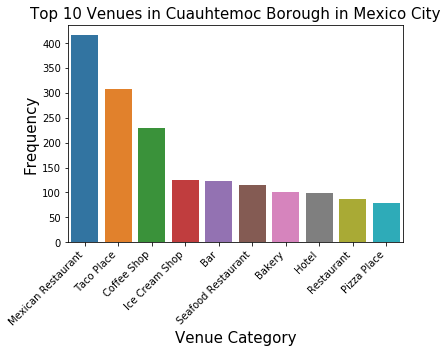

<Figure size 1296x504 with 0 Axes>

In [32]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=cuauhtemoc_venues_top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Top 10 Venues in Cuauhtemoc Borough in Mexico City', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

### Analyze Each Neighborhood

In [33]:
# one hot encoding
cuauhtemoc_onehot = pd.get_dummies(cuauhtemoc_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
cuauhtemoc_onehot['Neighborhood'] = cuauhtemoc_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [cuauhtemoc_onehot.columns[-1]] + list(cuauhtemoc_onehot.columns[:-1])
cuauhtemoc_onehot = cuauhtemoc_onehot[fixed_columns]

cuauhtemoc_onehot.head()

,Yoga Studio,Advertising Agency,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Candy Store,Casino,Castle,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College & University,College Bookstore,Comfort Food Restaurant,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Distillery,Dog Run,Donut Shop,Drugstore,Electronics Store,Exhibit,Farmers Market,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Fountain,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Juice Bar,Laundromat,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Museum,Music Store,Music Venue,Nature Preserve,Neighborhood,New American Restaurant,Nightclub,Opera House,Optical Shop,Other Great Outdoors,Other Nightlife,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pizza Place,Plaza,Pool,Pool Hall,Print Shop,Pub,Public Art,Recording Studio,Residential Building (Apartment / Condo),Restaurant,Rock Club,Russian Restaurant,Salad Place,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Bar,Sports Club,Stationery Store,Steakhouse,Street Art,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tattoo Parlor,Tea Room,Theater,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Warehouse Store,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Algarin,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Algarin,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Algarin,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

And let's examine the new dataframe size.

In [34]:
cuauhtemoc_onehot.shape

(3966, 193)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [35]:
cuauhtemoc_grouped = cuauhtemoc_onehot.groupby('Neighborhood').mean().reset_index()
cuauhtemoc_grouped

,Neighborhood,Yoga Studio,Advertising Agency,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Candy Store,Casino,Castle,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College & University,College Bookstore,Comfort Food Restaurant,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Distillery,Dog Run,Donut Shop,Drugstore,Electronics Store,Exhibit,Farmers Market,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Fountain,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Juice Bar,Laundromat,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Museum,Music Store,Music Venue,Nature Preserve,New American Restaurant,Nightclub,Opera House,Optical Shop,Other Great Outdoors,Other Nightlife,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pizza Place,Plaza,Pool,Pool Hall,Print Shop,Pub,Public Art,Recording Studio,Residential Building (Apartment / Condo),Restaurant,Rock Club,Russian Restaurant,Salad Place,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Bar,Sports Club,Stationery Store,Steakhouse,Street Art,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tattoo Parlor,Tea Room,Theater,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Warehouse Store,Wings Joint,Women's Store
0,Algarin,0.000000,0.043478,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.086957,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.086957,0.000000,0.043478,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.217391,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

Let's confirm the new size

In [36]:
cuauhtemoc_grouped.shape

(70, 193)

Let's print each neighborhood along with the top 5 most common venues

In [46]:
num_top_venues = 5

for hood in cuauhtemoc_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = cuauhtemoc_grouped[cuauhtemoc_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Algarin----
                           venue  freq
0             Mexican Restaurant  0.22
1                     Taco Place  0.17
2                 Clothing Store  0.09
3                         Bakery  0.09
4  Paper / Office Supplies Store  0.04


----Ampliacion Asturias----
                venue  freq
0      Ice Cream Shop  0.10
1  Mexican Restaurant  0.10
2          Taco Place  0.10
3                 Bar  0.05
4               Diner  0.05


----Asturias----
                  venue  freq
0    Mexican Restaurant  0.18
1                Bakery  0.18
2          Cupcake Shop  0.06
3  Fast Food Restaurant  0.06
4             Gift Shop  0.06


----Atlampa----
                  venue  freq
0    Mexican Restaurant  0.33
1     Convenience Store  0.08
2  Gym / Fitness Center  0.08
3    Photography Studio  0.08
4              Pharmacy  0.08


----Banorte----
                venue  freq
0         Coffee Shop  0.10
1  Mexican Restaurant  0.09
2          Taco Place  0.07
3               Plaza  0.

4  Seafood Restaurant  0.04


----Maza----
                 venue  freq
0   Mexican Restaurant  0.14
1  Arts & Crafts Store  0.10
2           Taco Place  0.10
3     Department Store  0.07
4           Restaurant  0.07


----Nonoalco Tlatelolco----
                venue  freq
0  Mexican Restaurant  0.11
1         Pizza Place  0.07
2       Movie Theater  0.07
3        Burger Joint  0.07
4          Taco Place  0.04


----Obrera----
                venue  freq
0                 Bar  0.20
1          Taco Place  0.17
2  Mexican Restaurant  0.10
3  Seafood Restaurant  0.07
4              Bakery  0.07


----Partido de La Revolucion Democratica----
                venue  freq
0          Taco Place  0.09
1  Mexican Restaurant  0.06
2               Hotel  0.06
3          Restaurant  0.05
4      Ice Cream Shop  0.05


----Paulino Navarro----
                venue  freq
0  Mexican Restaurant  0.12
1      Ice Cream Shop  0.09
2          Taco Place  0.06
3         Coffee Shop  0.06
4       Burrito Pla

Let's put that into a pandas dataframe.  

Firstly, let's write a function to sort the venues in descending order.

In [47]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [48]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = cuauhtemoc_grouped['Neighborhood']

for ind in np.arange(cuauhtemoc_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(cuauhtemoc_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Algarin,Mexican Restaurant,Taco Place,Bakery,Clothing Store,South American Restaurant,Food Truck,Steakhouse,Print Shop,Gym / Fitness Center,Dance Studio
1,Ampliacion Asturias,Taco Place,Mexican Restaurant,Ice Cream Shop,Diner,Flea Market,Restaurant,Café,Food Truck,Bed & Breakfast,Bar
2,Asturias,Bakery,Mexican Restaurant,Bar,Juice Bar,Cupcake Shop,Café,Fast Food Restaurant,Dessert Shop,Ice Cream Shop,Gift Shop
3,Atlampa,Mexican Restaurant,Convenience Store,Auto Garage,Nightclub,Optical Shop,Performing Arts Venue,Pharmacy,Photography Studio,Gym / Fitness Center,Asian Restaurant
4,Banorte,Coffee Shop,Mexican Restaurant,Taco Place,Plaza,Hotel,Seafood Restaurant,Hostel,Bar,Café,Pizza Place


### Cluster Neighborhoods  

Run k-means to cluster the neighborhood into 5 clusters.

In [49]:
# set number of clusters
kclusters = 5

cuauhtemoc_grouped_clustering = cuauhtemoc_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cuauhtemoc_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 4, 4, 2, 1, 0, 1, 3, 4, 4], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [50]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

cuauhtemoc_merged = cuauhtemoc_data

# merge cuauhtemoc_grouped with cuauhtemoc_data to add latitude/longitude for each neighborhood
cuauhtemoc_merged = cuauhtemoc_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

cuauhtemoc_merged.head() # check the last columns!

,index,PostalCode,Neighborhood,Borough,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,48,6880,Algarin,Cuauhtemoc,19.4053,-99.1408,3,Mexican Restaurant,Taco Place,Bakery,Clothing Store,South American Restaurant,Food Truck,Steakhouse,Print Shop,Gym / Fitness Center,Dance Studio
1,54,6890,Ampliacion Asturias,Cuauhtemoc,19.4070,-99.1313,4,Taco Place,Mexican Restaurant,Ice Cream Shop,Diner,Flea Market,Restaurant,Café,Food Truck,Bed & Breakfast,Bar
2,113,6850,Asturias,Cuauhtemoc,19.4039,-99.1308,4,Bakery,Mexican Restaurant,Bar,Juice Bar,Cupcake Shop,Café,Fast Food Restaurant,Dessert Shop,Ice Cream Shop,Gift Shop
3,116,6450,Atlampa,Cuauhtemoc,19.4581,-99.1562,2,Mexican Restaurant,Convenience Store,Auto Garage,Nightclub,Optical Shop,Performing Arts Venue,Pharmacy,Photography Studio,Gym / Fitness Center,Asian Restaurant
4,125,6038,Banorte,Cuauhtemoc,19.4364,-99.1553,1,Coffee Shop,Mexican Restaurant,Taco Place,Plaza,Hotel,Seafood Restaurant,Hostel,Bar,Café,Pizza Place


Finally, let's visualize the resulting clusters

In [56]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cuauhtemoc_merged['latitude'], cuauhtemoc_merged['longitude'], cuauhtemoc_merged['Neighborhood'], cuauhtemoc_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine Clusters  
Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster.  
Based on the defining categories, we can then assign a name to each cluster in future reports.

#### Cluster 1

In [67]:
cuauhtemoc_merged.loc[cuauhtemoc_merged['Cluster Labels'] == 0, cuauhtemoc_merged.columns[[1,2] + list(range(5, cuauhtemoc_merged.shape[1]))]]

,PostalCode,Neighborhood,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,6350,Buenavista,-99.1507,0,Ice Cream Shop,Taco Place,Mexican Restaurant,Gym / Fitness Center,Clothing Store,Chinese Restaurant,Sporting Goods Shop,Bar,Convenience Store,Electronics Store
23,6140,Condesa,-99.1795,0,Ice Cream Shop,Coffee Shop,Bakery,Burger Joint,Spa,Italian Restaurant,Yoga Studio,Sandwich Place,Snack Place,Restaurant
26,6357,Delegacion Politica Cuauhtemoc,-99.1507,0,Ice Cream Shop,Taco Place,Mexican Restaurant,Gym / Fitness Center,Clothing Store,Chinese Restaurant,Sporting Goods Shop,Bar,Convenience Store,Electronics Store
29,6840,Esperanza,-99.1286,0,Seafood Restaurant,Coffee Shop,Burger Joint,Mexican Restaurant,Warehouse Store,Snack Place,Sandwich Place,Market,Brewery,Movie Theater
35,6100,Hipodromo,-99.1795,0,Ice Cream Shop,Coffee Shop,Bakery,Burger Joint,Spa,Italian Restaurant,Yoga Studio,Sandwich Place,Snack Place,Restaurant
36,6170,Hipodromo Condesa,-99.1795,0,Ice Cream Shop,Coffee Shop,Bakery,Burger Joint,Spa,Italian Restaurant,Yoga Studio,Sandwich Place,Snack Place,Restaurant
40,6171,Instituto Mexicano de Comercio Exterior,-99.1795,0,Ice Cream Shop,Coffee Shop,Bakery,Burger Joint,Spa,Italian Restaurant,Yoga Studio,Sandwich Place,Snack Place,Restaurant
50,6700,Roma Norte,-99.1634,0,Cocktail Bar,Coffee Shop,Mexican Restaurant,Italian Restaurant,Pizza Place,Seafood Restaurant,Bar,Taco Place,Comfort Food Restaurant,Bakery
56,6179,Secretaria de Economia,-99.1795,0,Ice Cream Shop,Coffee Shop,Bakery,Burger Joint,Spa,Italian Restaurant,Yoga Studio,Sandwich Place,Snack Place,Restaurant
61,6707,Secretaria de Transportes y Vialidad,-99.1634,0,Cocktail Bar,Coffee Shop,Mexican Restaurant,Italian Restaurant,Pizza Place,Seafood Restaurant,Bar,Taco Place,Comfort Food Restaurant,Bakery


#### Cluster 2

In [68]:
cuauhtemoc_merged.loc[cuauhtemoc_merged['Cluster Labels'] == 1, cuauhtemoc_merged.columns[[1,2] + list(range(5, cuauhtemoc_merged.shape[1]))]]

,PostalCode,Neighborhood,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,6038,Banorte,-99.1553,1,Coffee Shop,Mexican Restaurant,Taco Place,Plaza,Hotel,Seafood Restaurant,Hostel,Bar,Café,Pizza Place
6,6780,Buenos Aires,-99.1499,1,Gym,Taco Place,Pizza Place,Paper / Office Supplies Store,Boutique,Beer Garden,Juice Bar,Bar,Convenience Store,Argentinian Restaurant
10,6796,Camara Nacional de la Industria Cinematografica,-99.1563,1,Taco Place,Hotel,Mexican Restaurant,Ice Cream Shop,Restaurant,Pizza Place,Art Gallery,Seafood Restaurant,Flea Market,Optical Shop
11,6000,Centro (Area 1),-99.1553,1,Coffee Shop,Mexican Restaurant,Taco Place,Plaza,Hotel,Seafood Restaurant,Hostel,Bar,Café,Pizza Place
12,6010,Centro (Area 2),-99.1553,1,Coffee Shop,Mexican Restaurant,Taco Place,Plaza,Hotel,Seafood Restaurant,Hostel,Bar,Café,Pizza Place
13,6020,Centro (Area 3),-99.1553,1,Coffee Shop,Mexican Restaurant,Taco Place,Plaza,Hotel,Seafood Restaurant,Hostel,Bar,Café,Pizza Place
14,6040,Centro (Area 4),-99.1553,1,Coffee Shop,Mexican Restaurant,Taco Place,Plaza,Hotel,Seafood Restaurant,Hostel,Bar,Café,Pizza Place
15,6050,Centro (Area 5),-99.1553,1,Coffee Shop,Mexican Restaurant,Taco Place,Plaza,Hotel,Seafood Restaurant,Hostel,Bar,Café,Pizza Place
16,6060,Centro (Area 6),-99.1553,1,Coffee Shop,Mexican Restaurant,Taco Place,Plaza,Hotel,Seafood Restaurant,Hostel,Bar,Café,Pizza Place
17,6070,Centro (Area 7),-99.1553,1,Coffee Shop,Mexican Restaurant,Taco Place,Plaza,Hotel,Seafood Restaurant,Hostel,Bar,Café,Pizza Place


#### Cluster 3

In [69]:
cuauhtemoc_merged.loc[cuauhtemoc_merged['Cluster Labels'] == 2, cuauhtemoc_merged.columns[[1,2] + list(range(5, cuauhtemoc_merged.shape[1]))]]

,PostalCode,Neighborhood,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,6450,Atlampa,-99.1562,2,Mexican Restaurant,Convenience Store,Auto Garage,Nightclub,Optical Shop,Performing Arts Venue,Pharmacy,Photography Studio,Gym / Fitness Center,Asian Restaurant
20,6725,Centro Medico Siglo XXI,-99.1493,2,Mexican Restaurant,Bar,Pie Shop,Taco Place,Burger Joint,Shopping Mall,Fish & Chips Shop,Market,Flea Market,Pharmacy
28,6720,Doctores,-99.1493,2,Mexican Restaurant,Bar,Pie Shop,Taco Place,Burger Joint,Shopping Mall,Fish & Chips Shop,Market,Flea Market,Pharmacy
34,6479,Hemphill Schools,-99.1550,2,Mexican Restaurant,Brewery,Auto Garage,Bridge,Performing Arts Venue,Restaurant,Japanese Restaurant,Indie Theater,Bakery,Nightclub
37,6729,Hospital General de Mexico,-99.1493,2,Mexican Restaurant,Bar,Pie Shop,Taco Place,Burger Joint,Shopping Mall,Fish & Chips Shop,Market,Flea Market,Pharmacy
52,6470,San Rafael,-99.1550,2,Mexican Restaurant,Brewery,Auto Garage,Bridge,Performing Arts Venue,Restaurant,Japanese Restaurant,Indie Theater,Bakery,Nightclub
65,6727,Tesoreria del Distrito Federal,-99.1493,2,Mexican Restaurant,Bar,Pie Shop,Taco Place,Burger Joint,Shopping Mall,Fish & Chips Shop,Market,Flea Market,Pharmacy
67,6728,Unidad Soldominio,-99.1493,2,Mexican Restaurant,Bar,Pie Shop,Taco Place,Burger Joint,Shopping Mall,Fish & Chips Shop,Market,Flea Market,Pharmacy


#### Cluster 4

In [70]:
cuauhtemoc_merged.loc[cuauhtemoc_merged['Cluster Labels'] == 3, cuauhtemoc_merged.columns[[1,2] + list(range(5, cuauhtemoc_merged.shape[1]))]]

,PostalCode,Neighborhood,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,6880,Algarin,-99.1408,3,Mexican Restaurant,Taco Place,Bakery,Clothing Store,South American Restaurant,Food Truck,Steakhouse,Print Shop,Gym / Fitness Center,Dance Studio
7,6589,Camara Nacional de Aerotransportes,-99.1461,3,Mexican Restaurant,Taco Place,Seafood Restaurant,Bar,Convenience Store,Brewery,Gym,Food,Breakfast Spot,Music Store
22,6598,Comision Federal de Electricidad,-99.1461,3,Mexican Restaurant,Taco Place,Seafood Restaurant,Bar,Convenience Store,Brewery,Gym,Food,Breakfast Spot,Music Store
25,6500,Cuauhtemoc,-99.1461,3,Mexican Restaurant,Taco Place,Seafood Restaurant,Bar,Convenience Store,Brewery,Gym,Food,Breakfast Spot,Music Store
27,6309,Direccion General de Recaudacion de la SHCP,-99.1435,3,Mexican Restaurant,Taco Place,Gym,Bar,Seafood Restaurant,Convenience Store,Bakery,Breakfast Spot,Brewery,Candy Store
32,6300,Guerrero,-99.1435,3,Mexican Restaurant,Taco Place,Gym,Bar,Seafood Restaurant,Convenience Store,Bakery,Breakfast Spot,Brewery,Candy Store
44,6800,Obrera,-99.1392,3,Bar,Taco Place,Mexican Restaurant,Seafood Restaurant,Bakery,Indie Theater,Clothing Store,Café,Bistro,Public Art
64,6599,Telefonos de Mexico S.A. de CV,-99.1461,3,Mexican Restaurant,Taco Place,Seafood Restaurant,Bar,Convenience Store,Brewery,Gym,Food,Breakfast Spot,Music Store


#### Cluster 5

In [71]:
cuauhtemoc_merged.loc[cuauhtemoc_merged['Cluster Labels'] == 4, cuauhtemoc_merged.columns[[1,2] + list(range(5, cuauhtemoc_merged.shape[1]))]]

,PostalCode,Neighborhood,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,6890,Ampliacion Asturias,-99.1313,4,Taco Place,Mexican Restaurant,Ice Cream Shop,Diner,Flea Market,Restaurant,Café,Food Truck,Bed & Breakfast,Bar
2,6850,Asturias,-99.1308,4,Bakery,Mexican Restaurant,Bar,Juice Bar,Cupcake Shop,Café,Fast Food Restaurant,Dessert Shop,Ice Cream Shop,Gift Shop
8,6609,Camara Nacional de Comercio de la Ciudad de Me...,-99.1449,4,Mexican Restaurant,Taco Place,Deli / Bodega,Bookstore,Bakery,Seafood Restaurant,Coffee Shop,Furniture / Home Store,Café,Restaurant
9,6693,Camara Nacional de Transportes y Comunicacion,-99.1449,4,Mexican Restaurant,Taco Place,Deli / Bodega,Bookstore,Bakery,Seafood Restaurant,Coffee Shop,Furniture / Home Store,Café,Restaurant
30,6250,Ex-Hipodromo de Peralvillo,-99.1347,4,Mexican Restaurant,Pie Shop,Auto Workshop,Gym,Pizza Place,Department Store,Diner,Breakfast Spot,Convenience Store,Food Court
31,6280,Felipe Pescador,-99.1253,4,Arts & Crafts Store,Taco Place,Convenience Store,Restaurant,Gym,Bakery,Park,Coffee Shop,Department Store,Dessert Shop
38,6698,IMSS,-99.1449,4,Mexican Restaurant,Taco Place,Deli / Bodega,Bookstore,Bakery,Seafood Restaurant,Coffee Shop,Furniture / Home Store,Café,Restaurant
41,6600,Juarez,-99.1449,4,Mexican Restaurant,Taco Place,Deli / Bodega,Bookstore,Bakery,Seafood Restaurant,Coffee Shop,Furniture / Home Store,Café,Restaurant
42,6270,Maza,-99.1279,4,Mexican Restaurant,Taco Place,Arts & Crafts Store,Restaurant,Department Store,Seafood Restaurant,Sandwich Place,Bus Stop,Lounge,Food Stand
43,6900,Nonoalco Tlatelolco,-99.1424,4,Mexican Restaurant,Movie Theater,Burger Joint,Pizza Place,Park,Sushi Restaurant,Big Box Store,Diner,Restaurant,Brewery


## Results

As we can se according the results presented that all the information labeled as cluster =1 is the zone which have much more neighbourhood with top 10 venues compared with other clusters

This statement can be true due to most of its neighbourhoods are located in Mexico City Centre which is well know is a turistic place with lots of museums, shops and restaurants to visit for.

The frecuency of this venues are concentrated in the industry of prepared food such as Mexican Restaurants, Taco places, Coffee shops, Bars, etc.


## Discussion  

Acording to the problem to solve and the results, this information can be really useful, not only for the persone who likes to move to a neighbourhood which has the main venues into a Borough in the City.

Moreover, this information can be useful as well, for people thinking in start a new business and what would be the best option to choose.

Finally, this sort of analysis can be complemented adding information about the cost of renting house or even if you want to choose a safer place to live you can include crime records dataset in the same city.

## Conclusion  

There are many models for clustering out there. In this report, we have presented a model that is considered the one of the simplest model among them. Despite its simplicity, *k*-means is vastly used for clustering in many data science applications, especially useful if you need to quickly discover insights from unlabeled data.  

This report can be complemented with othe models such as DBScan and its results can vary or confirm the obtained results.